# Datathon

Objetivo del proyecto: Predecir si un envio llegara a tiempo o no.

Vamos a ver una breve descripcion de las columnas que componen nuestro dataset.

## Descripción de las dimensiones

- ID: identificador del registro de orden (valor entero).
- Warehouse_block: Almacén de distribución de donde salió la orden (A a F).
- Mode_of_Shipment: Medio de transporte (Flight, Road, Ship).
- Customer_care_calls: Número de llamadas a atención al cliente que hubo por esa orden. (valores enteros del 2 al 7)
- Customer_rating: Puntaje del cliente (valores enteros 1 al 5).
- Cost_of_the_Product: Costo del producto (valor numérico entero de 96 a 310).
- Prior_purchases: Número de compras previas realizadas por el cliente (valor numérico entero de 2 a 10).
- Product_importance: Nivel de importancia del producto (low, medium, high).
- Gender: Género del comprador (F, M).
- Discount_offered: Porcentaje de descuento ofrecido por esa compra (valor numérico entero de 1 a 65):
- Weight_in_gms: Peso del paquete de la orden, en gramos (valor numérico entero de 1001 a 7846).
- Reached.on.Time_Y.N: Información sobre la llegada del paquete a destino (1 si llegó a tiempo, 0 si no llegó a tiempo).

Seguiremos los pasos recomendados para un buen preprocesamientos de datos.


### **1. Valores faltantes**

In [1]:
import pandas as pd

df = pd.read_csv('E-Commerce_train.csv')
print(df.shape[0])
df.info()

8999
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


Vemos que no contamos con valores faltantes.

### **2. Valores atipicos**

Vamos a utilizar el metodos de las 3 sigmas para determinar si es outlier o no.

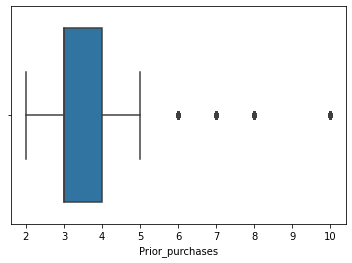

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = 'Prior_purchases', data = df)
plt.show()

In [3]:
df.Prior_purchases.value_counts()

3     3347
2     2239
4     1752
5      863
6      402
10     152
7      126
8      118
Name: Prior_purchases, dtype: int64

In [4]:
# Media
mean = df.Prior_purchases.mean()
mean

3.511501277919769

In [5]:
# Desviacion estandar
std =df.Prior_purchases.std()
std

1.5320739073647065

Vamos a utilizar el metodo 3sigmas para determinar que valores son considerados outliers.

In [6]:
print('Cantidad de registros totales:', df.shape[0])
print('Cantidad de outliers:', df[(df['Prior_purchases']<mean -3*std) | (df['Prior_purchases']>mean +3*std)].shape[0] )

Cantidad de registros totales: 8999
Cantidad de outliers: 152


Vemos que la unica variable numerica que tiene valores outliers de acuerdo al metodo seguido es la feature "Cantidad de compras previas" (Prior_purchases).

In [7]:
out_GvLivArea = ((df['Prior_purchases']<mean -3*std) | (df['Prior_purchases']>mean +3*std)) 

df = df[~out_GvLivArea]

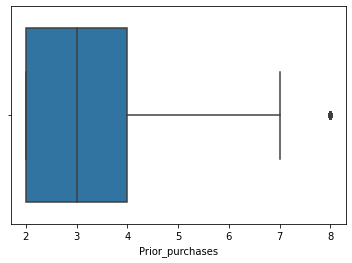

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = 'Prior_purchases', data = df)
plt.show()

In [9]:
print('Tamaño del dataset, luego de eliminar outliers en Prior_purchases:', df.shape[0])

Tamaño del dataset, luego de eliminar outliers en Prior_purchases: 8847


### **3. Codificacion de variables categoricas**

Codificaremos las variables categoricas a variables binarias (dummies) para poder hacer un analisis de correlacion.


In [10]:
df = pd.get_dummies(df , columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], drop_first=True)


Se agregan las columas categoricas codificadas

In [11]:
print(df.shape)
df.head()

(8847, 17)


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,2,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,3,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,4,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,5,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0


Ploteamos un mapa de correlacion

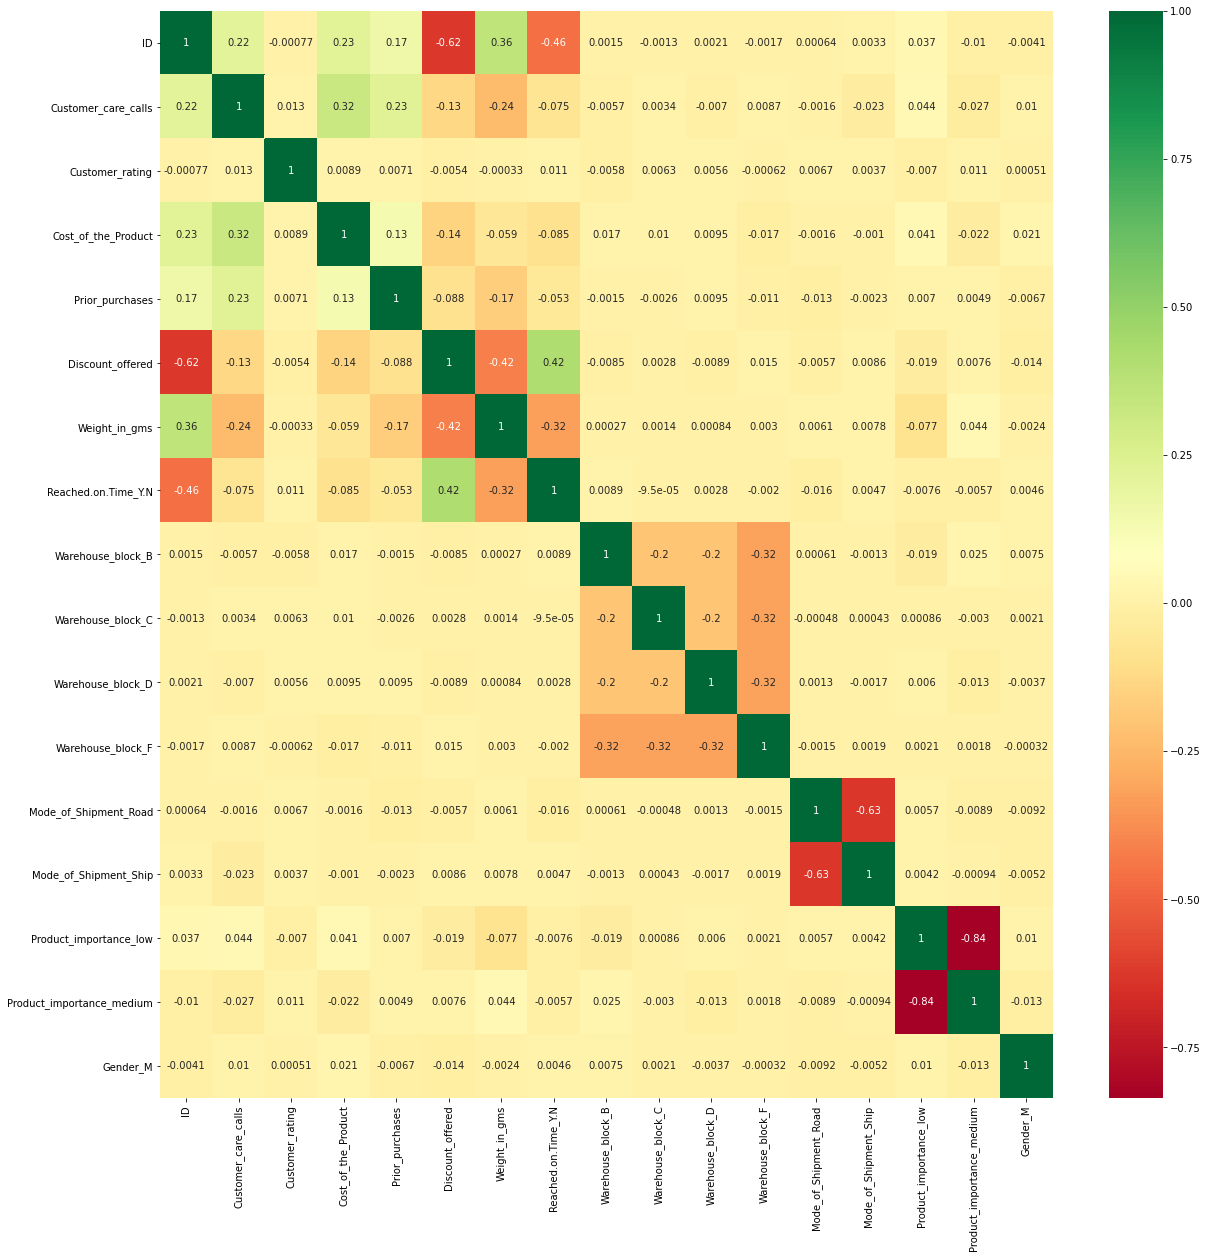

In [12]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df.corr(),annot=True, cmap="RdYlGn")

Viendo la matriz de confusion vamos a proceder con la eliminacion de algunas variables(features)



2. Product_importance: tiene una alta correlacion con Product_importance_low por lo que que es info redundante y ninguna correlacion con ninguna otra variable.

3. Gender_M: no aporta tampoco mas informacion.

4. Warehouse_block: Tampoco representan algun tipo de info util solo tienen algun tipo relacion entre los distintos bloques.

5. Consumer_rating: De las numericas es la que menos nos explica tambien asi que la vamos a dropear.

In [13]:
#Eliminamos las columnas
data = df.drop(columns=['Warehouse_block_B',
'Warehouse_block_C','Warehouse_block_D','Warehouse_block_F','Customer_rating'], axis=1)

In [14]:
data

,ID,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,177,3,44,1233,1,0,0,1,0,0
1,2,4,216,2,59,3088,1,0,0,1,0,1
2,3,2,183,4,48,3374,1,0,0,1,0,1
3,4,3,176,4,10,1177,1,0,0,0,1,1
4,5,2,184,3,46,2484,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,3,217,3,1,4177,1,0,1,1,0,0
8995,8996,5,232,3,3,4526,0,0,1,0,1,1
8996,8997,4,260,3,6,4221,0,0,1,0,1,0
8997,8998,4,184,3,5,5931,1,0,1,0,1,0


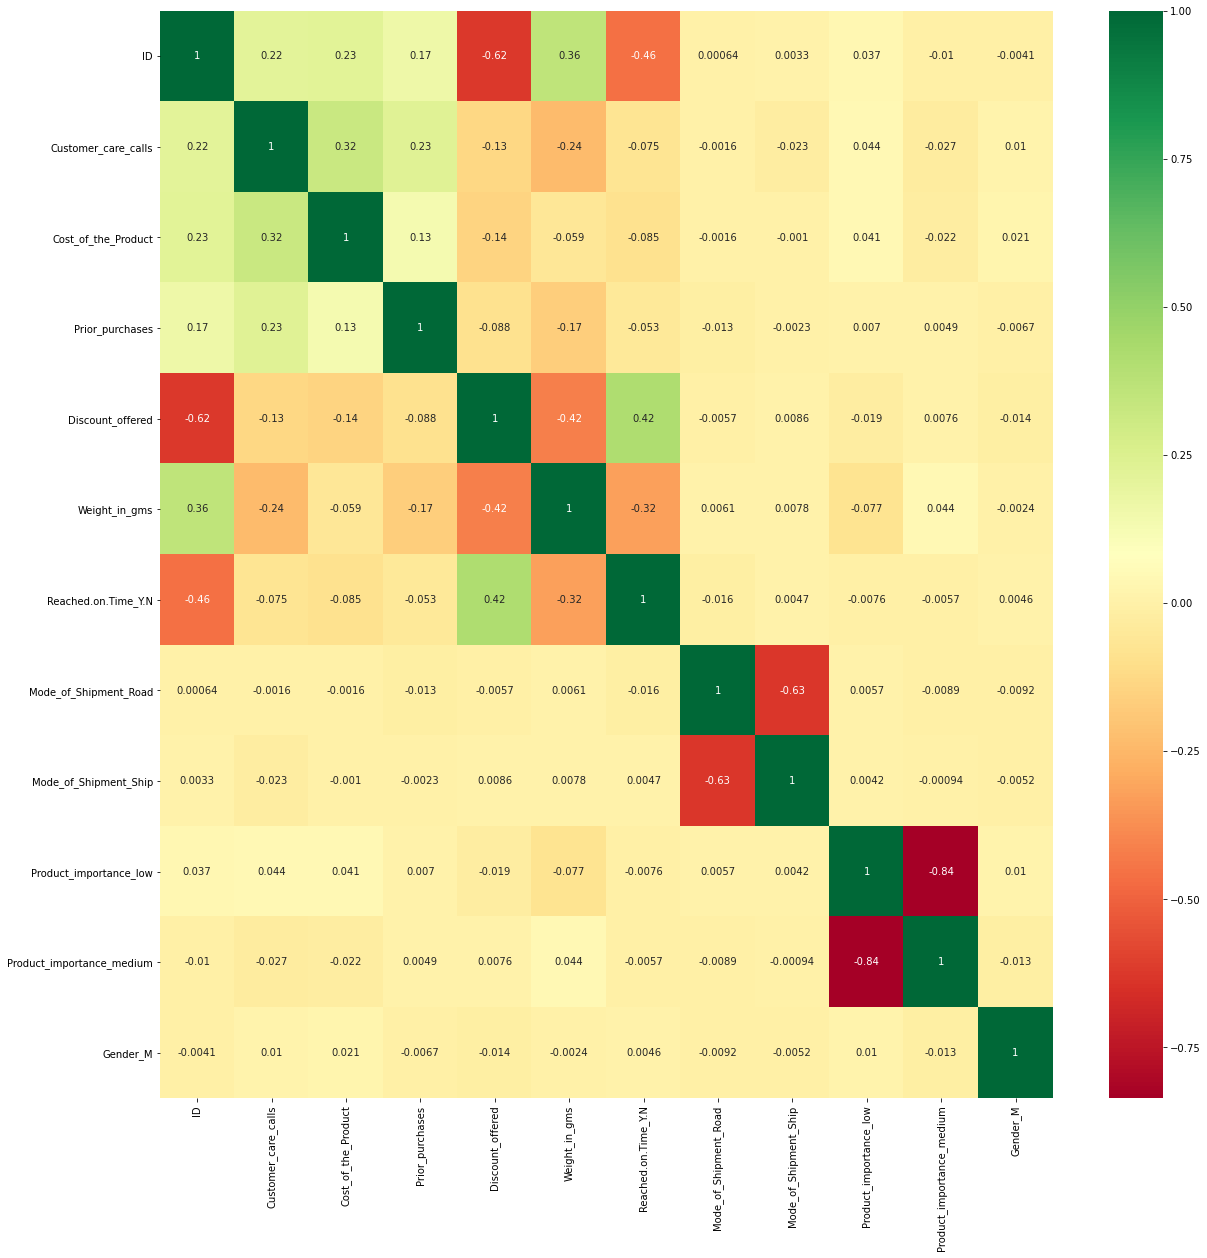

In [15]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data.corr(),annot=True, cmap="RdYlGn")

### Modelo De Emsamble - XGBoost

Vamos a ver como es el balanceo de nuestro dataset

In [16]:
balanceo = data['Reached.on.Time_Y.N'].value_counts()[1]/ data.shape[0]
print('El dataset tiene un' ,round(balanceo,2) ,'de envios llegados a tiempo')

El dataset tiene un 0.64 de envios llegados a tiempo


Vamos a dividir el nuestro dataset en entramiento y test

In [17]:
data.head()

,ID,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,177,3,44,1233,1,0,0,1,0,0
1,2,4,216,2,59,3088,1,0,0,1,0,1
2,3,2,183,4,48,3374,1,0,0,1,0,1
3,4,3,176,4,10,1177,1,0,0,0,1,1
4,5,2,184,3,46,2484,1,0,0,0,1,0


Definimos los features y la variable objetivo.

In [18]:
X = data.drop('Reached.on.Time_Y.N', axis = 1)
y = data['Reached.on.Time_Y.N']

Hacemos el split del dataset

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

X_test.shape, y_test.shape

((2212, 11), (2212,))

Vamos a normalizar para reducir el impacto en la diferencia de unidades.

In [20]:
from sklearn.preprocessing import StandardScaler
#SCALER
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [21]:
# Modelo
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

**Esquema de validación cruzada:** definimos la cantidad de folds, con el método StratifiedKFold

In [22]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5, random_state=19, shuffle=True)

param_grid=  {'n_estimators': [3,6,10],
               'learning_rate':[0.001,0.01,0.02], 
               'max_depth':[1,2,3], 
               'colsample_bytree':[0.8],
                'subsample': [0.8], 
               'colsample_bylevel': np.arange(0.2, 0.6, 0.1)}


Metrica Objetivo: Recall (explicar recall)

In [23]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb, param_grid, cv=folds, scoring='recall')

In [ ]:
grid.fit(X_train_scl, y_train)

Vemos el mejor hiperparametro que nos da el Gridsearch

In [25]:
print('Mejores hiperparametros', grid.best_params_)

Mejores hiperparametros {'colsample_bylevel': 0.2, 'colsample_bytree': 0.8, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 3, 'subsample': 0.8}


Lo aplicamos y entrenamo el modelo.

In [32]:
model_xgb = XGBClassifier(colsample_bylevel=0.2, colsample_bytree= 0.8, learning_rate=0.001, max_depth=1, n_estimators=3, subsample=0.8)
model_xgb.fit(X_train_scl, y_train)

[17:49:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.2,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

Obtenemos nuestro recall de train

In [33]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report
print('Recall Train :',recall_score(y_train, model_xgb.predict(X_train_scl)))

Recall Train : 1.0


c:\Users\Dell\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Predecimos y obtenemos nuestro recall de test

In [34]:
y_pred = model_xgb.predict(X_test_scl)

c:\Users\Dell\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [35]:
print('Recall Test :',recall_score(y_test,y_pred))

Recall Test : 1.0


Text(33.0, 0.5, 'Reales')

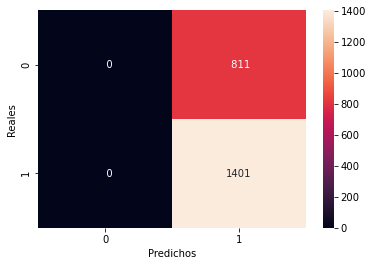

In [36]:
plot=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [37]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       811
           1       0.63      1.00      0.78      1401

    accuracy                           0.63      2212
   macro avg       0.32      0.50      0.39      2212
weighted avg       0.40      0.63      0.49      2212



c:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
